In [1]:
!pip install thefuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt
from thefuzz import fuzz , process

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.5 MB/s eta 0:00:00


**Dataset**

In [2]:
##df = pd.read_csv('/content/candyhierarchy2017.xlsx')
df = pd.read_excel('/content/candyhierarchy2017.xlsx')
pd.set_option('display.max_columns',120)
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

**Explore the data (checking info, check duplicates ,show summary statistics, nan values)**

In [3]:
df.shape

(2460, 120)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [7]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [8]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

**Dropping the columns that have so many missing values**

In [9]:
df.drop(['Q12: MEDIA [Daily Dish]  ', 'Q12: MEDIA [ESPN]  ', 'Q12: MEDIA [Yahoo]'], axis=1, inplace=True, errors='ignore')

**cleaning going out column**

In [10]:
df['Q1: GOING OUT?']

0       NaN
1        No
2       NaN
3        No
4        No
       ... 
2455     No
2456     No
2457     No
2458     No
2459     No
Name: Q1: GOING OUT?, Length: 2460, dtype: object

In [11]:
df['Q1: GOING OUT?'].fillna(df['Q1: GOING OUT?'].mode()[0],inplace= True)

In [13]:
df['Q1: GOING OUT?']

0       No
1       No
2       No
3       No
4       No
        ..
2455    No
2456    No
2457    No
2458    No
2459    No
Name: Q1: GOING OUT?, Length: 2460, dtype: object

**Cleaning Gender column**

In [14]:
df['Q2: GENDER']

0          NaN
1         Male
2         Male
3         Male
4         Male
         ...  
2455      Male
2456    Female
2457    Female
2458      Male
2459    Female
Name: Q2: GENDER, Length: 2460, dtype: object

In [15]:
df['Q2: GENDER'].fillna("didn't want to say",inplace=True)

In [16]:
df['Q2: GENDER'].isna().sum()

0

<ipython-input-90-859ce4aafd37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q2: GENDER',data=df, palette="flare")


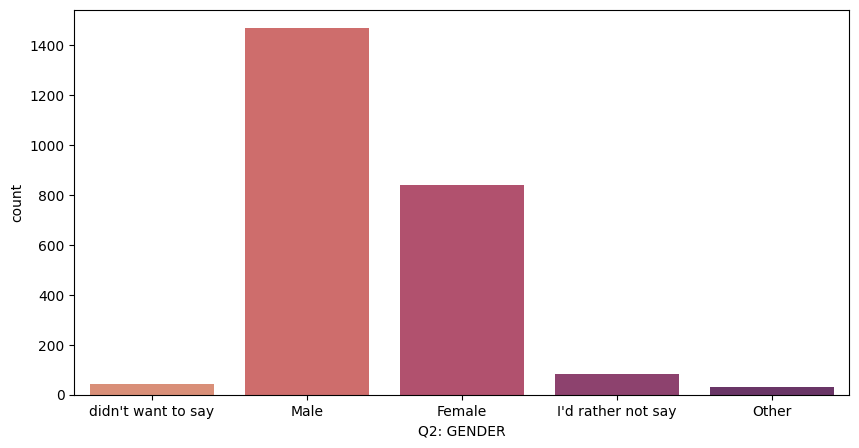

In [90]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Q2: GENDER',data=df, palette="flare")
plt.show()

**Cleaning Age column**

In [17]:
df['Q3: AGE'].describe()

count     2376
unique     106
top         40
freq        92
Name: Q3: AGE, dtype: int64

In [18]:
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')

In [19]:
impute =int(np.round(df['Q3: AGE'].mean()))
impute

43

In [20]:
df['Q3: AGE'].fillna(impute,inplace=True)

In [21]:
df['Q3: AGE']

0       43.0
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Q3: AGE, Length: 2460, dtype: float64

<ipython-input-84-2c0c0deef0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q3: AGE',data=df, palette="Set3")


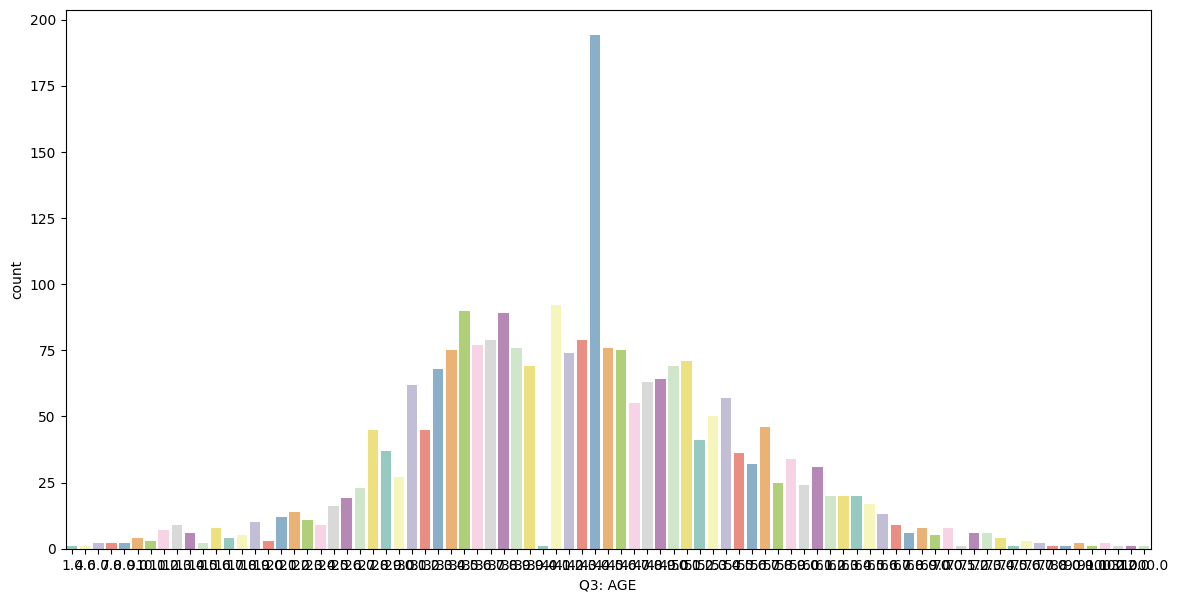

In [84]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Q3: AGE',data=df, palette="Set3")
plt.show()

**Cleaning country column**

In [22]:
df['Q4: COUNTRY'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [29]:
df['Q4: COUNTRY']=df['Q4: COUNTRY'].str.strip().str.lower()

countries = pd.Series(['usa','us','canada','murica','united states','uk','united kingdom','united states of america','u.s.a.','usausauaa','america','35','france',
                       'finland','unhigned states','us of a','the united states','north carolina','netherlands','germany','europe','earth','u.k.',
                       'costa rica','46','cascadia','australia','insanity lately','greece','USA? Hard to tell anymore..','usas','Pittsburgh','45','32','a','can','canae',
                       'new york','Trumpistan','ireland','korea','california','japan','south africa','I pretend to be from Canada, but I am really from the United States.',
                       'iceland','scotland','south korea','denmark','switzerland','Ahem....Amerca','ud','new jersey','indonesia','The Netherlands','endland','atlantis',
                       'murrika','USA! USA! USA!','alaska','soviet canuckistan','n. america','singapore','ussa','china','taiwan','ireland','hong kong',
                       'sweden','spain','narnia'])
for country in countries:
  matches = process.extract(country,df['Q4: COUNTRY'],limit=df.shape[0])
  for match in matches:
    if match[1]>=80:
      df.loc[df['Q4: COUNTRY']==match[0],'Q4: COUNTRY']=country

df['Q4: COUNTRY'].unique()

array([nan, 'usausauaa', 'canae', 'u.k.', 'mexico', 'north carolina',
       'The Netherlands', 'europe', 'costa rica', 'cascadia',
       'insanity lately', 'greece', 'Pittsburgh', 'new york',
       'Trumpistan', 'california', 'south africa', 'scotland',
       'switzerland', 'ud', 'south korea', 'new jersey', 'indonesia',
       'atlantis', 'singapore', 'hong kong', 'sweden',
       'fear and loathing'], dtype=object)

In [31]:
mapping = {'united states':'usa','united states of america':'usa','america':'usa','usausauaa':'usa','us of a':'usa','the united states':'usa','USA? Hard to tell anymore..':'usa',
           'usas':'usa','I pretend to be from Canada, but I am really from the United States.':'usa','Ahem....Amerca':'usa','a':'usa','USA! USA! USA!':'usa','ussa':'usa',
           'united kingdom':'uk','u.k.':'uk','35':'unknown','46':'unknown','45':'unknown','32':'unknown','earth':'unknown','insanity lately':'unknown','can':'canada','canae':'canada',
           'ud':'unknown','n. america':'north america'}
df['Q4: COUNTRY'].replace(mapping,inplace=True)
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'uk', 'mexico', 'north carolina',
       'The Netherlands', 'europe', 'costa rica', 'cascadia', 'unknown',
       'greece', 'Pittsburgh', 'new york', 'Trumpistan', 'california',
       'south africa', 'scotland', 'switzerland', 'south korea',
       'new jersey', 'indonesia', 'atlantis', 'singapore', 'hong kong',
       'sweden', 'fear and loathing'], dtype=object)

In [32]:
df['Q4: COUNTRY'].fillna('unknown',inplace=True)
df['Q4: COUNTRY'].isna().sum()

0

<ipython-input-88-0d3d0cd6c219>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q4: COUNTRY',data=df,palette='pastel')


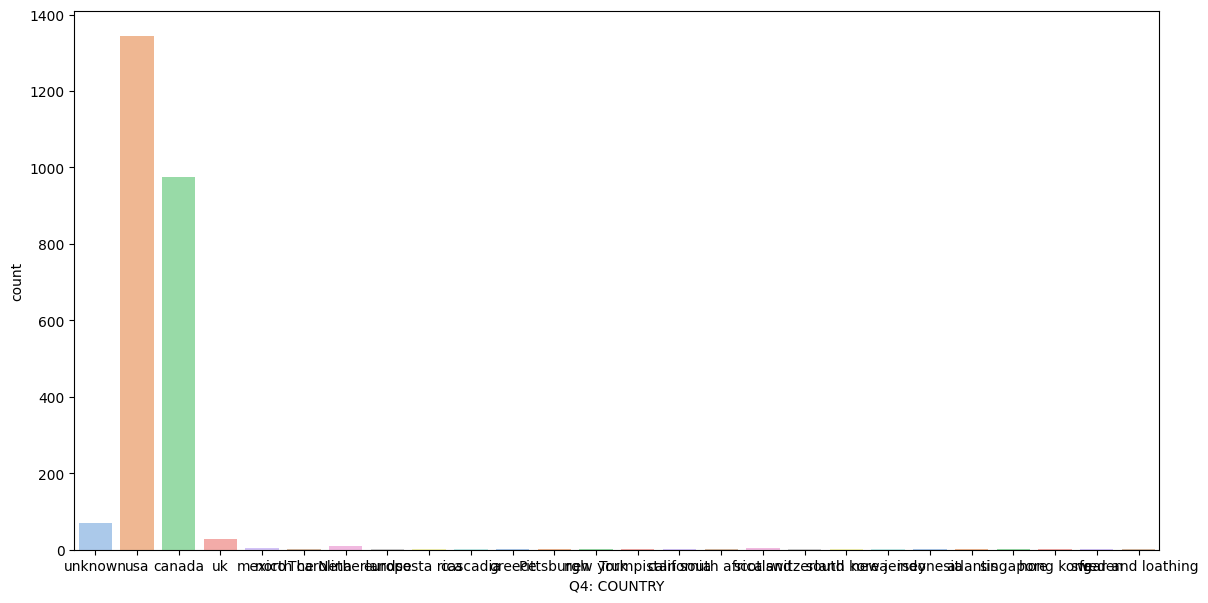

In [88]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Q4: COUNTRY',data=df,palette='pastel')
plt.show()

**'Q5: STATE, PROVINCE, COUNTY, ETC' >> this column will be dealt with as same as the country column**

In [41]:
## df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

**Cleaning '100 grand bar' column**

In [38]:
df['Q6 | 100 Grand Bar'].unique()

array([nan, 'MEH', 'JOY', 'DESPAIR'], dtype=object)

In [39]:
df['Q6 | 100 Grand Bar'].isna().sum()

747

In [40]:
df['Q6 | 100 Grand Bar'].fillna("don't really know",inplace=True)
df['Q6 | 100 Grand Bar'].isna().sum()

0

<ipython-input-78-953b1a0a6436>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q6 | 100 Grand Bar',data=df, palette="rocket_r")


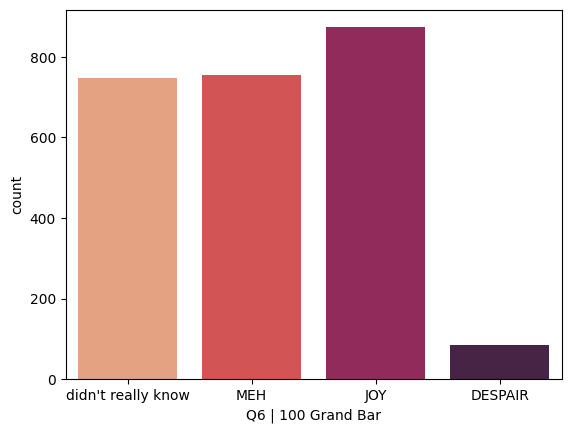

In [78]:
sns.countplot(x='Q6 | 100 Grand Bar',data=df, palette="rocket_r")
plt.show()

**Cleaning Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes) column**

In [42]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].isna().sum()

734

In [44]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].mode()

0    DESPAIR
Name: Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes), dtype: object

In [45]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].fillna("DESPAIR",inplace=True)
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].isna().sum()

0

**Q6 | Any full-sized candy bar column**

In [47]:
df['Q6 | Any full-sized candy bar'].fillna("didn't really know",inplace=True)
df['Q6 | Any full-sized candy bar'].isna().sum()

0

**Cleaning Q7: JOY OTHER column**

In [58]:
df['Q7: JOY OTHER'].isna().sum()

0

In [61]:
df['Q7: JOY OTHER'].fillna("don't really know",inplace=True)
df['Q7: JOY OTHER']

0                                       don't really know
1                                                  Mounds
2                                       don't really know
3       Reese's crispy crunchy bars, 5th avenue bars, ...
4                                       don't really know
                              ...                        
2455                                               Mounds
2456                                    don't really know
2457    Tiny bottles of maple syrup as given out by Cr...
2458                                    don't really know
2459                                    don't really know
Name: Q7: JOY OTHER, Length: 2460, dtype: object

**Cleaning Q8: DESPAIR OTHER column**

In [62]:
df['Q8: DESPAIR OTHER'].mode()

0    Trump
Name: Q8: DESPAIR OTHER, dtype: object

In [64]:
df['Q8: DESPAIR OTHER'].fillna("unknown",inplace=True)
df['Q8: DESPAIR OTHER'].isna().sum()

0

**Sine this column 'Q9: OTHER COMMENTS' has so many missing values, i'll drop it**

In [66]:
df['Q9: OTHER COMMENTS'].isna().sum()

2074

In [67]:
df.drop(['Q9: OTHER COMMENTS'], axis=1, inplace=True, errors='ignore')

**Cleaning Q10: DRESS column**

In [68]:
df['Q10: DRESS'].isna().sum()

744

In [69]:
df['Q10: DRESS'].fillna("unknown",inplace=True)
df['Q10: DRESS'].isna().sum()

0

**dropping the Unnamed: 113 column**

In [70]:
df['Unnamed: 113'].isna().sum()

2451

In [71]:
df.drop(['Unnamed: 113'], axis=1, inplace=True, errors='ignore')

**Cleaning Q11: DAY column**

In [73]:
df['Q11: DAY'].mode()

0    Friday
Name: Q11: DAY, dtype: object

In [74]:
df['Q11: DAY'].fillna('Friday',inplace=True)
df['Q11: DAY'].isna().sum()

0